<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Data2020/BTC_Robustness_Clusteringvolatility13Jan2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')

Mounted at /content/drive
Authenticated


In [3]:
import pandas as pd 
import numpy as np

In [4]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/btc_Kmeans_2020_12_31.csv',index_col='Unnamed: 0')
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2020-12-27,1049825.0,148.0,193716651.0,1.308896e+06,3.033870,4.911576e+11,1.618915e+11,1.866826e+13,0.000295,7.792538,0.000158,4.162860,89.698259,2.370802e+06,1.373446e+08,925.0,1.816875,2.444854e+07,925.0,2.444854e+07,76.839437,114.994093,1.0,26430.856597,261.737332,54.551925,1.858273e+07,2.056073e+07,1.449817e+07,304240.0,808638.0,241838.497017,6.391999e+09,0.657102,17367.771562,0.005215,137.846432,531357.733666,1.404424e+10,0.027924,0.034667,0.034255,4.905674e+10,1.751811,5.544874e+10,8.238012,2.681934e+07,2.100175e+10,50.174128,1.102133e+12,2.398156,0.017810,0.121826,0.112338,0.063885,0.089066,0.123253,0.132847,0.090978,0.028995,0.118794,0.100206,0.595074,0.471821,0.338974,0.247995,0.219001,0.100206,279.837598,94.450699,0.034667,0.034255,0.030030,0.027924,487.366929,54.231945,NaN,NaN,NaN,54.551925,98.872856,146.386991,189.052387,NaN,NaN,NaN,NaN
2020-12-28,1154354.0,160.0,206766595.0,1.292291e+06,3.033361,5.024921e+11,1.656552e+11,1.859959e+13,0.000327,8.834168,0.000164,4.436346,102.752936,2.778372e+06,1.479345e+08,1000.0,1.964065,2.703935e+07,1000.0,2.703935e+07,46.737221,115.311281,1.0,27039.349020,265.812917,52.374044,1.858373e+07,2.056098e+07,1.449831e+07,314503.0,874761.0,397621.711422,1.075143e+10,0.809730,21894.585318,0.005513,149.061442,708320.652738,1.915253e+10,0.027950,0.034447,0.034285,4.526595e+10,1.754172,5.601738e+10,8.071835,2.981772e+07,2.103157e+10,46.170214,1.332533e+12,2.029169,0.021149,0.127496,0.111604,0.063451,0.083734,0.121085,0.132213,0.091246,0.028996,0.118805,0.100221,0.592565,0.471481,0.339268,0.248022,0.219026,0.100221,272.669458,99.165301,0.034447,0.034285,0.030060,0.027950,474.438581,56.992307,NaN,NaN,NaN,52.374044,100.659837,149.414196,192.591228,NaN,NaN,NaN,NaN
2020-12-29,1146131.0,152.0,194179955.0,1.277500e+06,3.006909,5.060833e+11,1.683068e+11,1.859959e+13,0.000313,8.530911,0.000164,4.470274,104.816233,2.854272e+06,1.405378e+08,950.0,1.865880,2.586964e+07,950.0,2.586964e+07,54.785860,114.333016,1.0,27231.203455,276.673228,49.697118,1.858468e+07,2.056122e+07,1.449554e+07,334580.0,924443.0,339224.096073,9.237480e+09,0.765763,20852.655461,0.005631,153.351433,707904.496552,1.927709e+10,0.027902,0.034408,0.034289,5.128744e+10,1.754900,6.052492e+10,8.052861,2.872392e+07,2.106029e+10,48.270913,1.313616e+12,2.072995,0.019785,0.135661,0.105108,0.064458,0.082931,0.120875,0.131812,0.091394,0.028982,0.118768,0.100227,0.592058,0.471183,0.339371,0.247977,0.218996,0.100227,271.682580,100.231688,0.034408,0.034289,0.030010,0.027902,473.544137,57.505101,NaN,NaN,NaN,49.697118,100.180921,152.787915,199.428676,NaN,NaN,NaN,NaN
2020-12-30,1221579.0,172.0,215838093.0,1.254873e+06,3.148488,5.360990e+11,1.702719e+11,1.859959e+13,0.000315,9.091743,0.000171,4.940794,107.456738,3.099548e+06,1.590296e+08,1075.0,2.111160,3.100796e+07,1075.0,3.100796e+07,55.434481,119.111340,1.0,28844.613678,30

In [7]:
import matplotlib.pyplot as plt
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-bright')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [8]:
df['PUv_future90d']=df['PU Ratio_volatility'].shift(-90)

In [9]:
df_90=df[['PU Ratio_volatility','PUv_future90d','future90d_ROI']]

In [10]:
df_90=df_90.dropna()

In [11]:
df_90.head()

,PU Ratio_volatility,PUv_future90d,future90d_ROI
2011-01-14,2.557128,2.206894,149.663679
2011-01-15,2.341228,2.119640,154.837600
2011-01-16,2.324496,2.374523,170.594601
2011-01-17,1.893460,2.568113,214.198025
2011-01-18,1.424667,2.792061,267.242823


In [12]:
from sklearn.cluster import KMeans

In [13]:
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=5)
model.fit(df_90[['PU Ratio_volatility','PUv_future90d']])
labels90 = model.predict(df_90[['PU Ratio_volatility','PUv_future90d']])
labels90.reshape(-1,1)
df_90['labels90']=labels90
df_90.head()

,PU Ratio_volatility,PUv_future90d,future90d_ROI,labels90
2011-01-14,2.557128,2.206894,149.663679,0
2011-01-15,2.341228,2.119640,154.837600,0
2011-01-16,2.324496,2.374523,170.594601,0
2011-01-17,1.893460,2.568113,214.198025,0
2011-01-18,1.424667,2.792061,267.242823,0


In [14]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,19.087018,18.781748
1,62.133441,472.338083
2,118.753108,117.781216
3,481.501607,107.404328


In [15]:
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

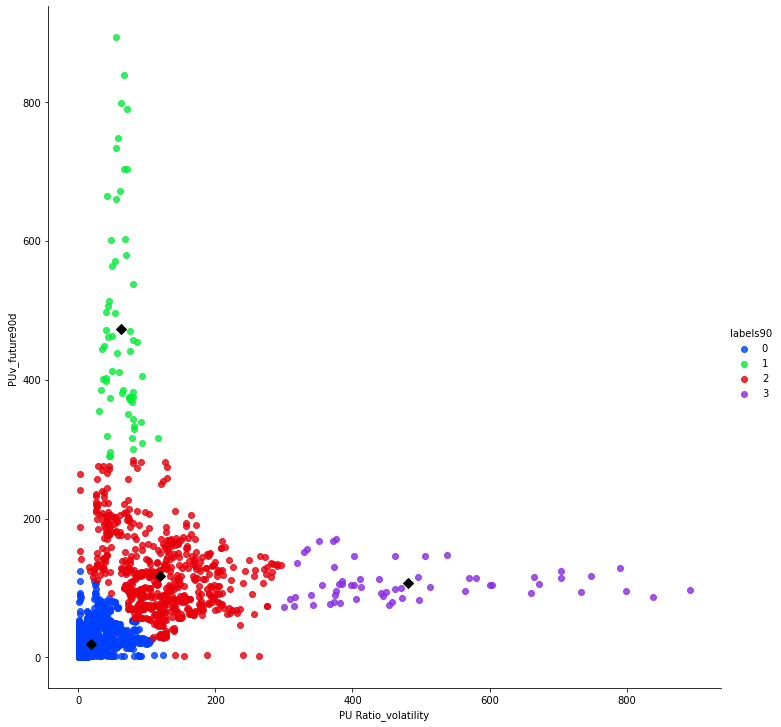

In [16]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio_volatility','PUv_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('PU90v_full')

In [17]:
df_90_ROI=df_90[['future90d_ROI','labels90']].groupby('labels90', as_index=False).agg(['min', 'max','mean','std'])
df_90_ROI.columns = ["_".join(x) for x in df_90_ROI.columns.ravel()]
df_90_ROI.index.name=None
df_90_ROI.head()

,future90d_ROI_min,future90d_ROI_max,future90d_ROI_mean,future90d_ROI_std
0,-83.710800,2258.089533,77.818274,252.827092
1,135.232018,827.458889,402.062893,205.771087
2,-76.415609,3171.652729,69.978477,273.862441
3,-61.350263,1.888167,-39.920606,16.410252


In [18]:
df90_PU=df_90[['PU Ratio_volatility','PUv_future90d','labels90']].groupby('labels90').agg(['min', 'max','mean','std'])
df90_PU=df90_PU.transpose()
df90_PU

labels90                           0           1           2           3
PU Ratio_volatility min     0.743233   30.622424    3.158295  300.563380
                    max   124.412725  116.333603  296.014098  892.703392
                    mean   19.110212   62.133441  118.808412  481.501607
                    std    18.996064   18.327501   58.119690  150.353801
PUv_future90d       min     0.743233  289.659656    2.659796   73.112225
                    max   124.412725  892.703392  284.738560  171.080747
                    mean   18.793931  472.338083  117.884665  107.404328
                    std    16.647866  152.227951   54.711343   25.435425

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

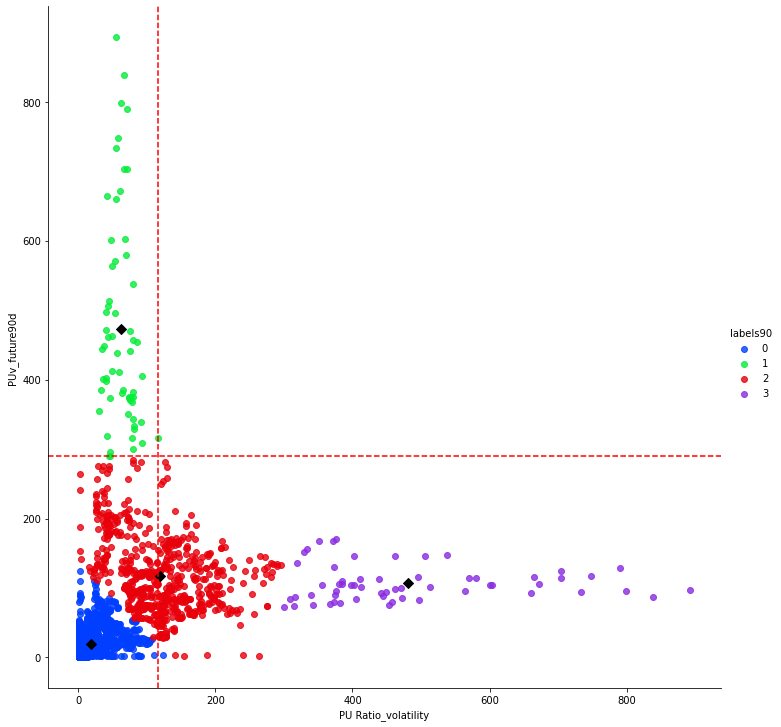

In [21]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio_volatility','PUv_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.axvline(116.333603, color='red', linestyle='--')
plt.axhline(289.659656, color='red', linestyle='--')


plt.savefig('/content/drive/My Drive/CVML2021/PU90v_full_annoted.png')

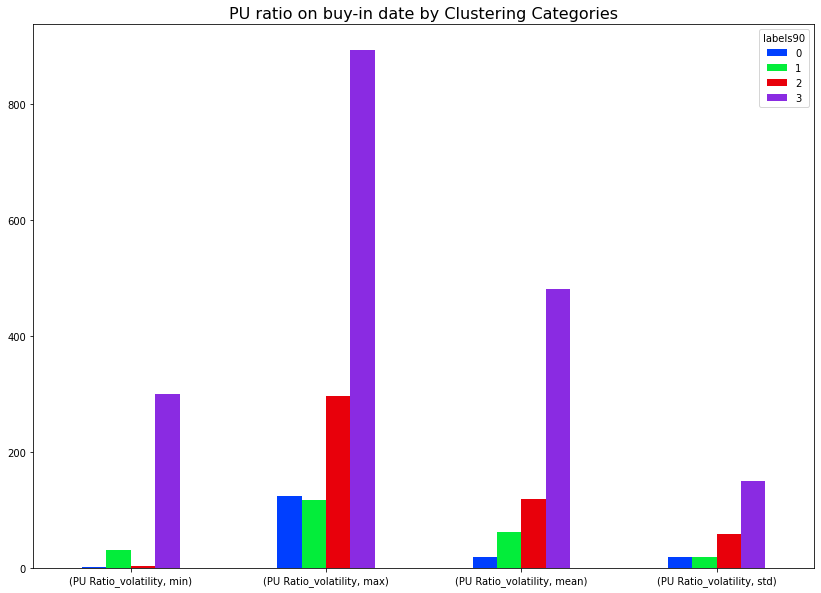

In [22]:
df90_PU.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PUv_full_buyin')

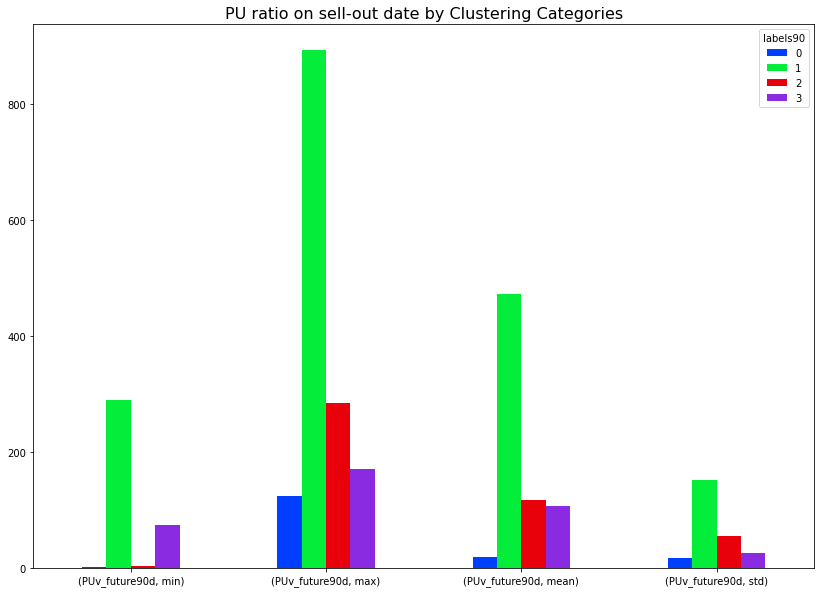

In [23]:
df90_PU.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PUv_full_sellout')

In [26]:
df_90_ROI=df_90_ROI.transpose()
df_90_ROI.columns=['labels90=0', 'labels90=1','labels90=2', 'labels90=3']
df_90_ROI.head()

,labels90=0,labels90=1,labels90=2,labels90=3
labels90=0,-83.710800,2258.089533,77.818274,252.827092
labels90=1,135.232018,827.458889,402.062893,205.771087
labels90=2,-76.415609,3171.652729,69.978477,273.862441
labels90=3,-61.350263,1.888167,-39.920606,16.410252


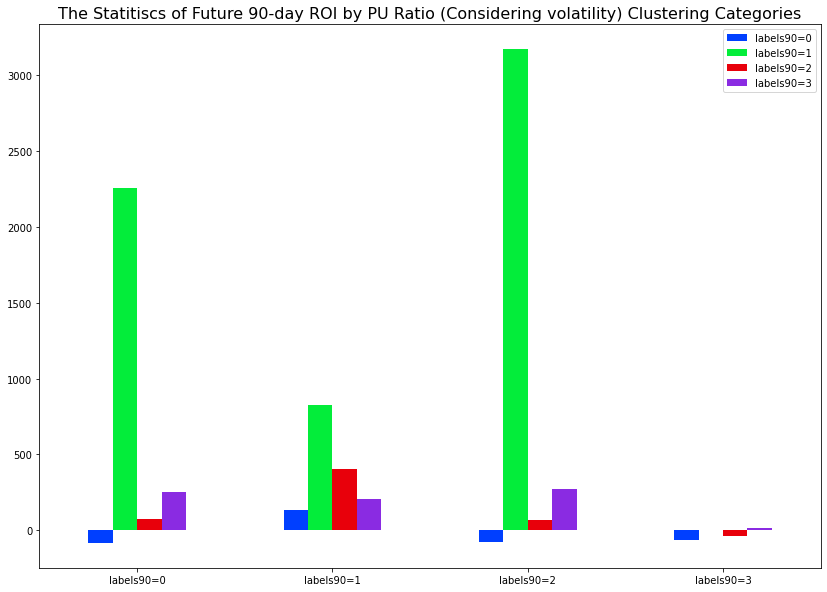

In [29]:
df_90_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 90-day ROI by PU Ratio (Considering volatility) Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/90vROI_full.png')

In [28]:
df.to_csv('btc_Kmeans_Robust_volatility_2020_12_31.csv')